In [1]:
x=[32,64,96,118,126,144,152,158]
y=[18,24,61.5,49,52,105,130,125]

In [3]:
from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(x,y)
print("slope: {}\nintercept: {}\nr_value: {}\np_value: {}\nstd_err: {}"\
      .format(slope,intercept,r_value,p_value,std_err))

slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
p_value: 0.00321829451984264
std_err: 0.18480710092393707


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

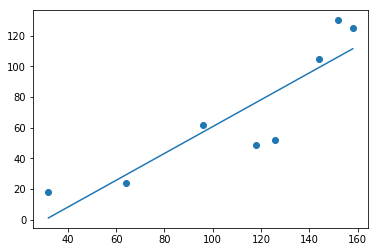

In [5]:
plt.scatter(x,y)
plt.plot(x, slope*np.array(x)+intercept,'-')
plt.show()

In [34]:
from sklearn.datasets import load_boston
boston=load_boston()
X=boston.data
y=boston.target

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
model_boston=LinearRegression().fit(X_train_scaled, y_train)
model_boston

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
model_boston.score(X_train_scaled, y_train)

0.7542976977535784

In [39]:
from sklearn.model_selection import cross_val_score
r2=cross_val_score(model_boston,X_train_scaled,y_train,cv=5)
r2

array([0.73466323, 0.71806869, 0.75868947, 0.76842206, 0.57987758])

In [40]:
r2.mean()

0.711944204678371

In [41]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,model_boston.predict(X_train_scaled)))

4.441116507974542

In [42]:
y_pred=model_boston.predict(X_test_scaled)
y_pred

array([27.03857889, 21.33489902, 22.89585957, 25.62569592, 19.66285209,
       15.03525417, 31.60477181, 17.1083778 , 18.20900421, 38.85795985,
       22.4974739 , 24.00574626, 26.97219775, 39.78309537,  6.47118337,
       30.47895428, 24.28728713, 17.0832695 , 14.78102725, 14.37449532,
       31.6213695 , 16.77635906, 16.4178108 , 18.42354357, 17.42958532,
       17.69868175, 26.45869254, 22.14396062, 31.40247764, 33.08233749,
       34.65230983, 22.77755456, 23.86629191, 15.36280621, 20.84822455,
       18.11018323, 23.99992242, 29.02817296, 19.38821835, 19.26306673,
       37.28234626, 16.01435335, 39.68048244, 18.51655883, 21.27203988,
       14.55745486, 36.25875696, 32.22609174, 19.74831204, 33.05474359,
       12.40470781, 37.43046907, 19.63532752,  5.89505464, 22.52404412,
       31.65545748, 25.52332287, 19.59200647, 10.76919354, 14.51148256,
       14.53383101, 24.84051932, 43.48062148, 32.64216928, 24.24996236,
       20.65255494, 16.55924833, 28.27409351, 22.23438836, 17.01

In [43]:
import math
from sklearn.metrics import mean_squared_error

rmse_test=math.sqrt(mean_squared_error(y_test,y_pred))
rmse_test

5.274700079920663

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7040017065410755

In [45]:
import statsmodels.api as sm
Boston=sm.datasets.get_rdataset('Boston',package='MASS')
boston_df=Boston.data
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
import statsmodels.formula.api as smf
formula='medv~'+'+'.join(boston_df.iloc[:,:-1].columns)
model_boston=smf.ols(formula=formula,data=boston_df).fit()
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        10:29:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
import statsmodels.formula.api as smf
formula='medv ~ rad + zn + rm + chas + age -1'
model_boston2=smf.ols(formula=formula,data=boston_df).fit()
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1363.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          5.05e-289
Time:                        10:29:09   Log-Likelihood:                -1654.6
No. Observations:                 506   AIC:                             3319.
Df Residuals:                     501   BIC:                             3340.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
y_pred=model_boston2.predict(boston_df)

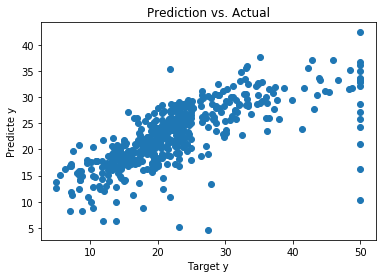

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
plt.scatter(boston_df.iloc[:,-1], y_pred)
plt.xlabel('Target y')
plt.ylabel('Predicte y')
plt.title('Prediction vs. Actual')
plt.show()

In [50]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

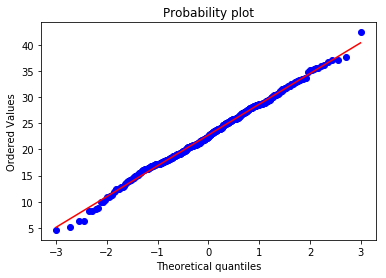

In [51]:
fig=plt.figure()
res=stats.probplot(y_pred,plot=plt)
plt.title('Probability plot')
plt.show()

In [52]:
import statsmodels.api as sm
Boston=sm.datasets.get_rdataset('Boston', package='MASS')
boston_off=Boston.data

formula='medv~'+'+'.join(boston_df.iloc[:,:-1].columns)

In [53]:
from patsy import dmatrices
y, X=dmatrices(formula,boston_df,return_type='dataframe')

In [54]:
import pandas as pd
vif=pd.DataFrame()

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['VIF Factor']=[variance_inflation_factor(X.values,i)
                   for i in range(X.shape[1])]
vif['features']=X.columns

In [56]:
vif

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


In [57]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [59]:
from sklearn.datasets import load_wine
import pandas as pd
wine =load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [60]:
from sklearn.datasets import load_breast_cancer
cancer =load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [61]:
from sklearn.datasets import load_digits
digits =load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [67]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [72]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
from sklearn.datasets import make_classification
X, y=make_classification(n_features=1,n_redundant=0,n_informative=1,n_clusters_per_class=1,random_state=1)

In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(X,y)

c:\machine_learning\python_source\pythontest\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
import numpy as np
xx=np.linspace(-3,3,100)
XX=xx[:,np.newaxis]
prob=model.predict_proba(XX)[:,1]

In [82]:
prob

array([1.87305273e-05, 2.30891819e-05, 2.84620806e-05, 3.50852197e-05,
       4.32494996e-05, 5.33134943e-05, 6.57191886e-05, 8.10113713e-05,
       9.98615331e-05, 1.23097312e-04, 1.51738771e-04, 1.87043086e-04,
       2.30559589e-04, 2.84197544e-04, 3.50309594e-04, 4.31794456e-04,
       5.32223269e-04, 6.55994964e-04, 8.08527220e-04, 9.96490982e-04,
       1.22809824e-03, 1.51345475e-03, 1.86499188e-03, 2.29799424e-03,
       2.83124326e-03, 3.48780001e-03, 4.29595437e-03, 5.29037116e-03,
       6.51346730e-03, 8.01705551e-03, 9.86429024e-03, 1.21319466e-02,
       1.49130525e-02, 1.83198712e-02, 2.24871959e-02, 2.75758567e-02,
       3.37762494e-02, 4.13115638e-02, 5.04402110e-02, 6.14567118e-02,
       7.46900383e-02, 9.04981050e-02, 1.09256878e-01, 1.31342510e-01,
       1.57105197e-01, 1.86834317e-01, 2.20715993e-01, 2.58786578e-01,
       3.00888385e-01, 3.46636456e-01, 3.95406192e-01, 4.46349982e-01,
       4.98446126e-01, 5.50576030e-01, 6.01618214e-01, 6.50542827e-01,
      

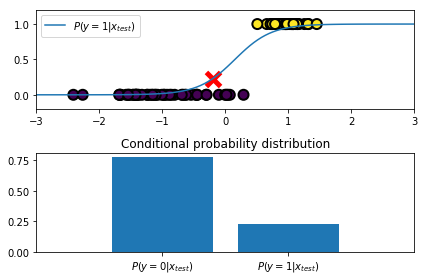

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
x_test=[[-0.2]]
plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X,y,marker='o',c=y,s=100,edgecolors='k',linewidths=2)
plt.scatter(x_test[0],model.predict_proba(x_test)[0][1:], marker='x',s=200,c='r',lw=5)
plt.xlim(-3,3)
plt.ylim(-.2,1.2)
plt.legend(['$P(y=1|x_{test})$'])
plt.subplot(212)
plt.bar(model.classes_,model.predict_proba(x_test)[0])
plt.xlim(-1,2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_,['$P(y=0|x_{test})$', '$P(y=1|x_{test})$'])
plt.title('Conditional probability distribution')
plt.tight_layout()
plt.show()

In [85]:
from sklearn.datasets import load_iris
import numpy as np
iris=load_iris()
idx=np.in1d(iris.target,[0,2])
X=iris.data[idx,0:2]
y=iris.target[idx]

In [86]:
from sklearn.linear_model import Perceptron
model=Perceptron(max_iter=100,eta0=0.1, random_state=1).fit(X,y)

c:\machine_learning\python_source\pythontest\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [87]:
model

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

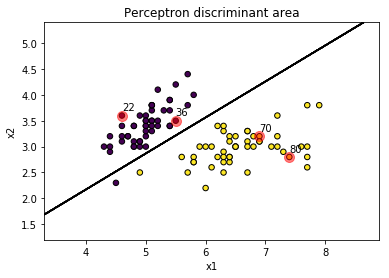

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
XX_min, XX_max=X[:,0].min()-1, X[:,0].max()+1
YY_min, YY_max=X[:,1].min()-1, X[:,1].max()+1
XX, YY=np.meshgrid(np.linspace(XX_min,XX_max,1000),np.linspace(YY_min,YY_max,1000))
ZZ=model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX,YY,ZZ,colors='k')
plt.scatter(X[:,0],X[:,1],c=y,s=30,edgecolors='k',linewidths=1)

idx=[22,36,70,80]
plt.scatter(X[idx,0],X[idx,1],c='r',s=100,alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i,0],X[i,1] + 0.1))
plt.grid(False)
plt.title('Perceptron discriminant area')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()